In [21]:
!pip install tensorflow
!pip3 install opencv-python
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.transform import rescale, resize,  downscale_local_mean 
from pandas import DataFrame
import keras 
from matplotlib import pyplot as plt 
import numpy as np 
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from skimage import io
from sklearn.preprocessing import LabelBinarizer 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Flatten 
from PIL import Image
from skimage import data

In [27]:
X=[]
Y=[]
base_path='C:/Users/tech/Downloads/e_dataset/train'
source_path=base_path
for child in os.listdir(source_path):
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            Qry = Qry.convert("RGB")
            Qry = np.array(Qry.resize((48,48)))
            #Qry = Qry.reshape([224,224,3])
            Qry = Qry[:,:,2]
            flist=np.array(Qry)
            X.append(flist)
            Y.append(child)

angry
disgust
fear
happy
neutral
sad
surprise


In [28]:
len(X)    

25438

In [29]:
len(Y)

25438

In [30]:
images_arr = np.array(X)  
images_arr = images_arr.astype('float32')
images_arr.shape 

(25438, 48, 48)

In [31]:
labelBinarizer = LabelBinarizer()
Y=labelBinarizer.fit_transform(Y) 
for i in range(Y.shape[0]): 
    print(Y[i])

[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0 0 0 0]
[1 0 0 0

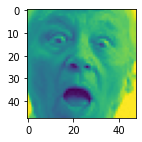

In [33]:
# Display the first image in training data for i in range(2): 
plt.figure(figsize=[2, 2]) 
curr_img = np.reshape(images_arr[i], (48,48))
plt.imshow(curr_img) 
plt.show()
images_arr = images_arr.reshape(-1,48,48)
images_arr = images_arr / np.max(images_arr)  

In [34]:
X_train,X_test,y_train,y_test = train_test_split(images_arr,Y,test_size=0.2,random_state =42,stratify=Y)

In [37]:
cnnModel= Sequential() 
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(48,48,1))) 
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(MaxPooling2D((2,2))) 
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))  
cnnModel.add(MaxPooling2D((2,2))) 
cnnModel.add(Conv2D(256, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(256, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(256, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(512, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(512, (5,5) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(512, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2))) 
cnnModel.add(Conv2D(512, (3,3) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(512, (3,3) , padding = 'same', activation="relu")) 
cnnModel.add(Conv2D(512, (3,3) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2))) 
cnnModel.add(Flatten()) 
cnnModel.add(Dense(300,activation="relu")) 
cnnModel.add(Dense(400,activation="relu")) 
cnnModel.add(Dense(7,activation="softmax")) 
cnnModel.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_34 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 conv2d_35 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 128)       409728    
                                                      

In [ ]:
cnnModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])
history_seq = cnnModel.fit(X_train,y_train,epochs=15,batch_size=64,verbose=1,validation_split=0.1)

Epoch 1/15
287/287 [==============================] - 1147s 4s/step - loss: 6.5362 - accuracy: 0.2851 - val_loss: 1.7125 - val_accuracy: 0.2924
Epoch 2/15
245/287 [========================>.....] - ETA: 2:40 - loss: 1.7154 - accuracy: 0.2865

In [12]:
testLoss, testAccuracy =cnnModel.evaluate(X_test,y_test)
print("Test Loss =", testLoss*100)
print("Test Accuracy =",(int)(testAccuracy*100))

6/6 [==============================] - 16s 3s/step - loss: 1.0752 - accuracy: 0.4358
Test Loss = 107.51960277557373
Test Accuracy = 43


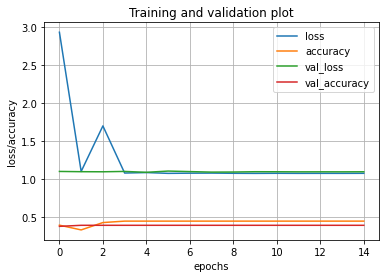

In [13]:
import pandas as pd
pd.DataFrame(history_seq.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [15]:
image = X[10] 
image = image.reshape(-1, 224,224)
image = image / np.max(image)
pred = cnnModel.predict(image) 
pred = labelBinarizer.inverse_transform(pred)
print(pred) 

['PNEUMONIA']


In [17]:
X[10]

array([[ 6,  6,  7, ...,  1,  1,  1],
       [ 7,  7,  8, ...,  3,  4,  5],
       [ 7,  8,  8, ...,  6,  7,  7],
       ...,
       [10, 10,  5, ...,  5,  7,  7],
       [10, 10,  5, ...,  5,  7,  7],
       [10, 10,  5, ...,  6,  6,  5]], dtype=uint8)